In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
data_dir = '/scratch/aew492/research-summer2020_output'
patch_dir = os.path.join(data_dir, 'gradient/1D/patch_data')

### m = 1

In [3]:
L = 1000
n = '4e-4'
m = 1
b = 0.5
nmocks = 401

In [4]:
cat_tag = f'L{int(L)}_n{n}_z057_patchy_As2x'

In [5]:
patch_data = np.load(os.path.join(patch_dir, f'{cat_tag}/8patches/{cat_tag}_rlz0_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item()
patch_data.keys()

dict_keys(['n_patches', 'patch_centers', 'r_avg', 'xi_patches', 'xi_patch_avg', 'xi_full', 'theta', 'grad_recovered'])

#### load in results with 8 patches

In [6]:
thetas_8 = np.empty((nmocks,4))
patch_info_8 = []
for i in range(nmocks):
    info = np.load(os.path.join(patch_dir, f'{cat_tag}/8patches/{cat_tag}_rlz{i}_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item()
    thetas_8[i] = info['theta'].flatten()
    patch_info_8.append(info)

#### load in results with 27 patches

In [7]:
thetas_27 = np.empty((nmocks,4))
patch_info_27 = []
for i in range(nmocks):
    info = np.load(os.path.join(patch_dir, f'{cat_tag}/27patches/{cat_tag}_rlz{i}_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item()
    thetas_27[i] = info['theta'].flatten()
    patch_info_27.append(info)

#### load in CFE results

In [8]:
amps_cfe = np.empty((nmocks,4))
cfe_info = []
for i in range(nmocks):
    info = np.load(os.path.join(data_dir, f'gradient/1D/suave_data/{cat_tag}/bao_iterative/{cat_tag}_rlz{i}_m-{m:.3f}-L_b-{b:.3f}.npy'), allow_pickle=True).item()
    amps_cfe[i] = info['amps']
    cfe_info.append(info)

#### plot results

In [9]:
thetas_8.shape

(401, 4)

In [10]:
grads_recovered_8 = thetas_8[:,1:].T / thetas_8[:,0].T
grads_recovered_27 = thetas_27[:,1:].T / thetas_27[:,0].T

grads_recovered_cfe = amps_cfe[:,1:].T / amps_cfe[:,0].T

In [11]:
grad_expected = np.array([m/(b*L),0,0])
grad_expected

array([0.002, 0.   , 0.   ])

Text(0.5, 0.98, 'Recovered Gradients, L1000_n4e-4_z057_patchy_As2x, m=[1, 0, 0], b=0.5')

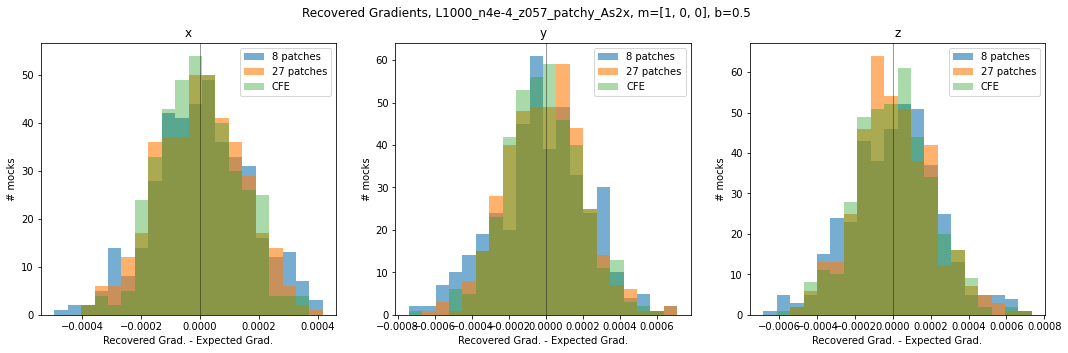

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

comps = ['x', 'y', 'z']
alpha = 0.6
for i, ax in enumerate(axs):
    _, bins, _ = ax.hist(grads_recovered_8[i]-grad_expected[i], bins=20, alpha=alpha, label='8 patches')
    ax.hist(grads_recovered_27[i]-grad_expected[i], bins=bins, alpha=alpha, label='27 patches')
    ax.hist(grads_recovered_cfe[i]-grad_expected[i], bins=bins, alpha=alpha-.2, label='CFE')
    
    ax.axvline(0, lw=1, color='k', alpha=0.4)
    ax.set_xlabel('Recovered Grad. - Expected Grad.')
    ax.set_ylabel('# mocks')
    ax.set_title(comps[i])
    ax.legend()

fig.suptitle(f'Recovered Gradients, {cat_tag}, m=[{m}, 0, 0], b={b}')

In [13]:
std_8 = np.std(grads_recovered_8, axis=1)
std_27 = np.std(grads_recovered_27, axis=1)
std_cfe = np.std(grads_recovered_cfe, axis=1)
std_8, std_27, std_cfe

(array([0.00016257, 0.00024822, 0.00023442]),
 array([0.00014921, 0.0002092 , 0.00021122]),
 array([0.00013798, 0.00019917, 0.00020374]))

Text(0.5, 0.98, 'L1000_n4e-4_z057_patchy_As2x')

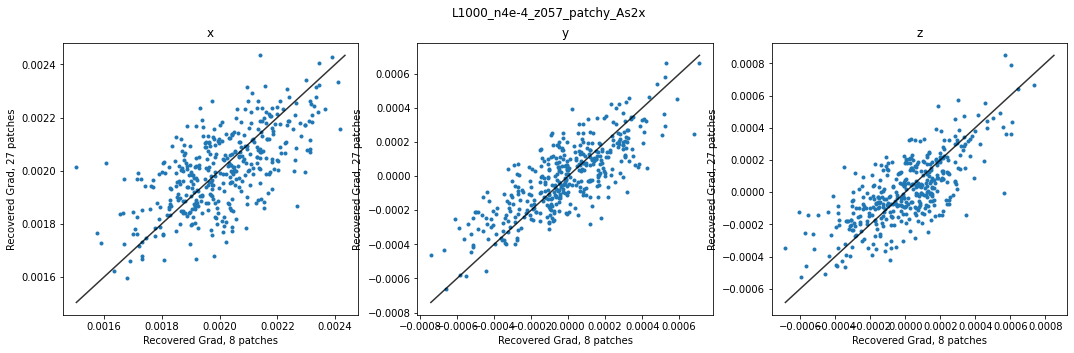

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(18,5))

for i, ax in enumerate(axs):

    min_grad = min(min(grads_recovered_8[i]), min(grads_recovered_27[i]))
    max_grad = max(max(grads_recovered_8[i]), max(grads_recovered_27[i]))

    ax.plot([min_grad,max_grad], [min_grad,max_grad], color='k', alpha=0.8)
    ax.scatter(grads_recovered_8[i], grads_recovered_27[i], marker='.')

    ax.set_xlabel('Recovered Grad, 8 patches')
    ax.set_title(comps[i])

axs[0.set_ylabel('Recovered Grad, 27 patches')
fig.suptitle(cat_tag)